# FFT para construir la respuesta frecuencial de un sistema dinámico


Ref[1]: https://dsp.stackexchange.com/questions/66541/how-can-i-plot-the-frequency-response-on-a-bode-diagram-with-fast-fourier-transf

Ref[2]: https://www.youtube.com/watch?v=QmgJmh2I3Fw

In [1]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy.signal import chirp, spectrogram
from scipy.fft import fft
#%matplotlib notebook #(no me anda)
#%matplotlib ipympl
#%matplotlib inline
%matplotlib widget

In [2]:
G=ctrl.tf(1,[1,1,1])
G

TransferFunction(array([1]), array([1, 1, 1]))

In [3]:
G.pole()

array([-0.5+0.8660254j, -0.5-0.8660254j])

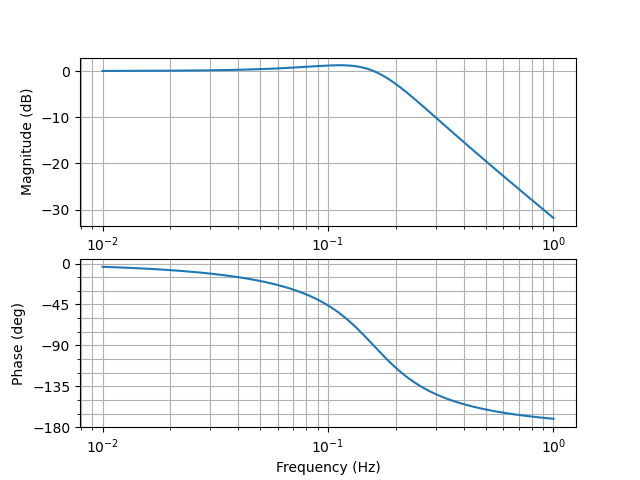

In [4]:
plt.figure()
mag1,phase1,omega1=ctrl.bode(G,dB=True,Hz=True);

In [5]:
N = 4096;             # numero de muestras (number of samples)
fs = 60;              # frecuencia de sampleo [muestras/s] (sampling rate)
n = np.arange(0, N-1); # sample index

t_final= (N-1)/fs# tiempo final
Ts=1/fs # periodo de sampleo

t = n/fs;             # time index

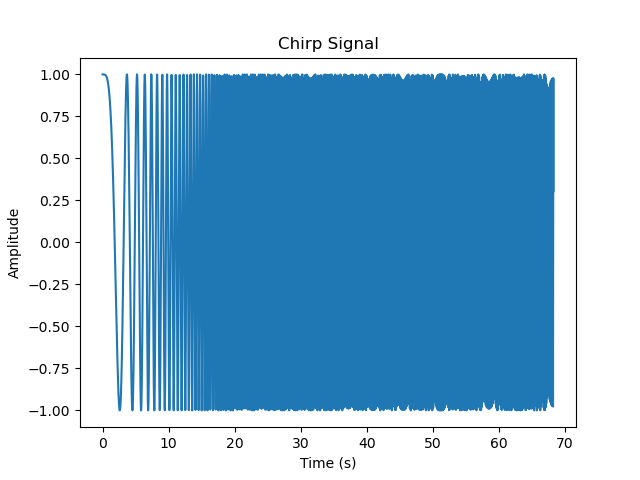

In [6]:
signal = chirp(t, f0=0.001, f1=10, t1=t[-1], method='linear')

# Plotting the chirp signal
plt.figure()
plt.plot(t, signal)
plt.title('Chirp Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

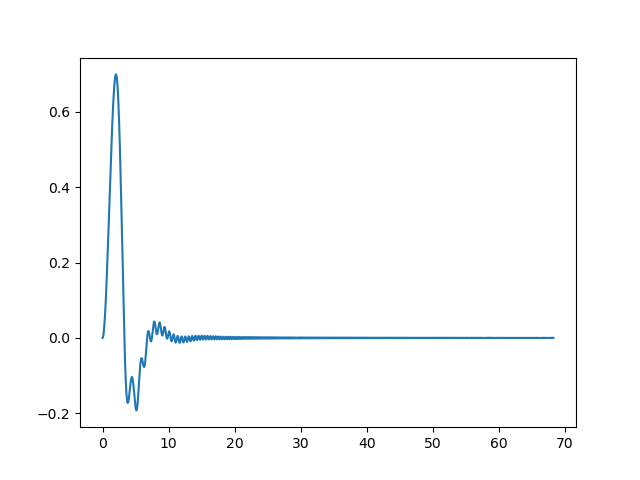

In [7]:
t,y=ctrl.forced_response(G,T=t,U=signal)
plt.figure()
plt.plot(t, y)

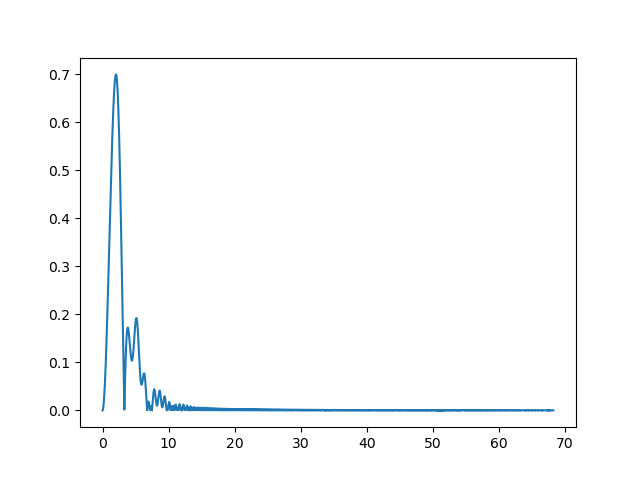

In [8]:
plt.figure();
plt.plot(t, abs(y))

In [9]:
fy=fft(y)
fu=fft(signal)
resp = fy/fu

faxis = n*fs/N;
half = 2048;
faxis

array([0.00000000e+00, 1.46484375e-02, 2.92968750e-02, ...,
       5.99414062e+01, 5.99560547e+01, 5.99707031e+01])

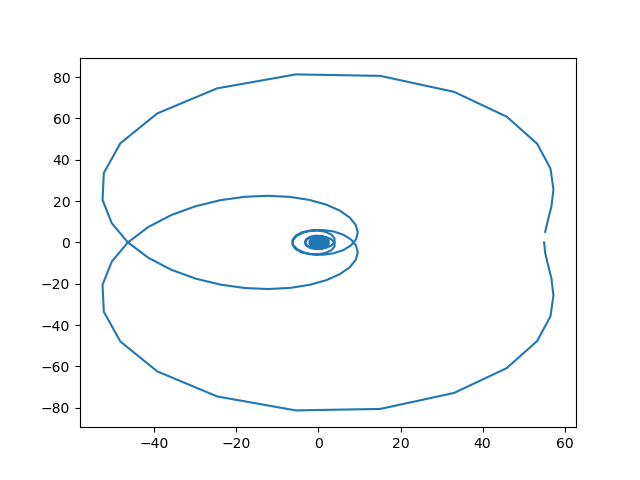

In [10]:
plt.figure();
plt.plot(fy.real,fy.imag)

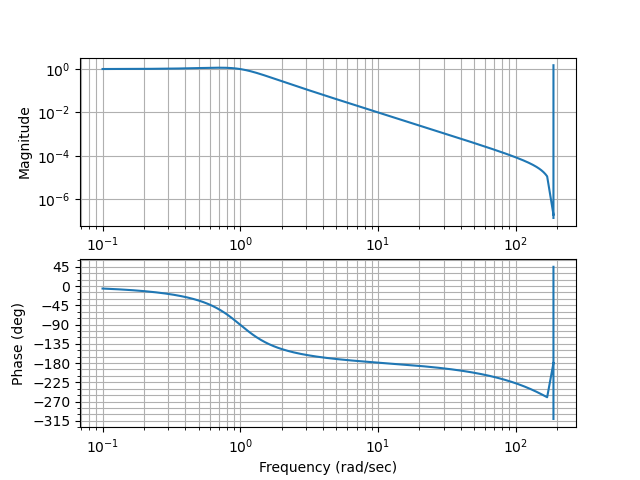

In [11]:
Gz=ctrl.c2d(G,Ts)
plt.figure();
mag,phase,omega=ctrl.bode(Gz)

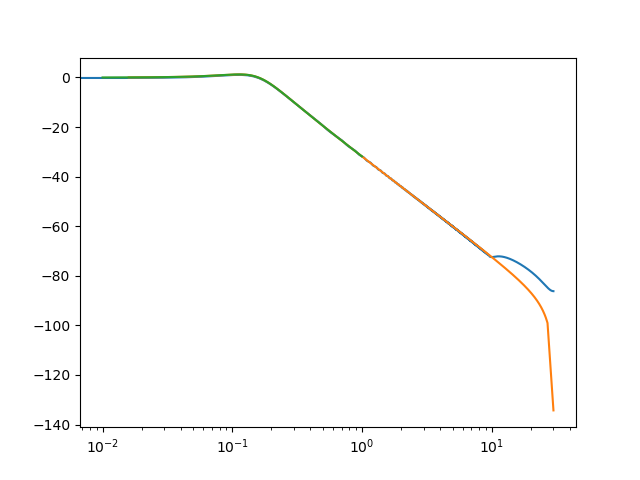

In [12]:
plt.figure();
plt.semilogx(faxis[0:half], 20*np.log10(abs(resp[0:half])),omega/2/np.pi,ctrl.mag2db(mag),omega1/2/np.pi,ctrl.mag2db(mag1));

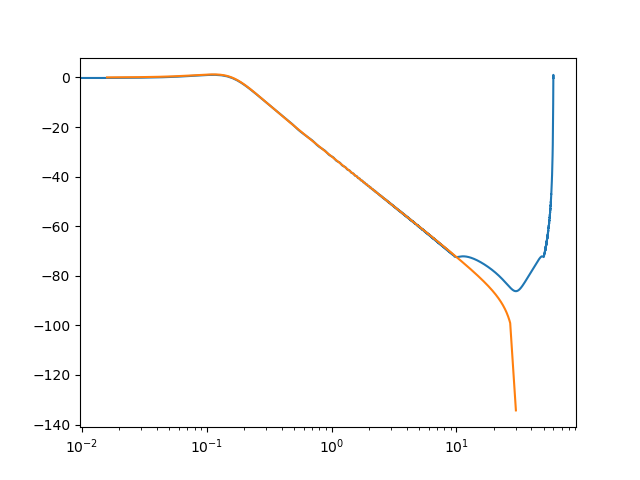

In [13]:
plt.figure();
plt.semilogx(faxis, 20*np.log10(abs(resp)),omega/2/np.pi,ctrl.mag2db(mag));